In [ ]:
"""
Objective:
    • Understand and practice principal component analysis using scikit learn.
"""

In [23]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

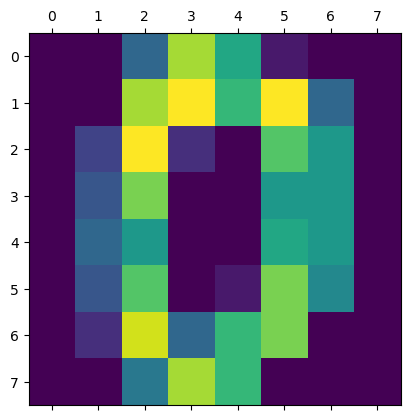

In [24]:
"""
Scikit learn comes with the pre-loaded dataset, load the digits dataset from 
that collection and write a helper function to plot the image using matplotlib.
[Hint: Explore datasets module from scikit learn]
"""

digits = load_digits()
plt.matshow(digits.images[0])
plt.show()

In [25]:
"""
Make a train-test split with 20% of the data set aside for testing. Fit a logistic 
regression model and observe the accuracy.
"""
images = digits.images.reshape(digits.images.shape[0], -1)
labels = digits.target

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=157)

lrm = LogisticRegression()
lrm.fit(x_train, y_train)

accuracy_score(y_test, lrm.predict(x_test))

c:\Users\Vishv\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9555555555555556

In [26]:
"""
Using scikit learn perform a PCA transformation such that the transformed 
dataset can explain 95% of the variance in the original dataset. Find out the 
number of components in the projected subspace.
[Hint: Refer to decomposition module of scikit learn]
"""

pca_m = PCA(n_components=10)
pca_m.fit(images)
pca_m.fit(x_train, y_train)
x_train = pca_m.transform(x_train)
x_test = pca_m.transform(x_test)

print(pca_m.explained_variance_ratio_)

[0.14550087 0.13562622 0.11864786 0.08535181 0.05845124 0.04903216
 0.04433292 0.03647761 0.03328627 0.03017551]


In [27]:
"""
Transform the dataset and fit a logistic regression and observe the accuracy. 
Compare it with the previous model and comment on the accuracy.
[Hint: Project both the train and test samples to the new subspace]
"""

lrm = LogisticRegression()
lrm.fit(x_train, y_train)
y_pred = lrm.predict(x_test)
accuracy_score(y_test, y_pred)

c:\Users\Vishv\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9166666666666666

In [30]:
"""
Compute the confusion matrix and count the number of instances that have
gone wrong. For each wrong sample, plot the digit along with the predicted 
and original label.
"""

cf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cf_matrix)
report = classification_report(y_test, y_pred)
print("\nClassification Matrix:\n", report)


Confusion Matrix:
 [[40  0  0  0  1  0  1  1  0  0]
 [ 0 20  0  0  1  0  0  0  4  2]
 [ 0  1 31  0  1  0  0  0  1  0]
 [ 0  0  0 41  0  0  0  0  1  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  0  0  0 29  1  0]
 [ 0  4  0  1  1  2  0  0 26  0]
 [ 0  2  0  2  0  1  0  0  0 24]]

Classification Matrix:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.71      0.74      0.73        27
           2       1.00      0.91      0.95        34
           3       0.93      0.98      0.95        42
           4       0.92      1.00      0.96        47
           5       0.92      0.97      0.94        34
           6       0.97      0.97      0.97        40
           7       0.97      0.97      0.97        30
           8       0.79      0.76      0.78        34
           9       0.89      0.83      0.86        29

    accuracy                